# Wrangle and Analyze Data

## Table of Contents
- [Introduction](#intro)
- [Gather](#gather)
- [Assess](#assess)
- [Clean](#clean)
- [Storing, analyzing, and visualizing the wrangled data](#sav)

<a id='intro'></a>
## Introduction

Real-world data rarely comes clean. Using Python and its libraries, I will gather data from a variety of sources and in a variety of formats, assess its quality and tidiness, then clean it. This is called data wrangling. I will document my  wrangling efforts in a Jupyter Notebook, plus showcase them through analyses and visualizations using Python (and its libraries) and/or SQL.

- My goal: wrangle WeRateDogs Twitter data to create interesting and trustworthy analyses and visualizations. The Twitter archive is great, but it only contains very basic tweet information. Additional gathering, then assessing and cleaning is required for "Wow!"-worthy analyses and visualizations.

**To get started, let's import our libraries.**

In [1]:
import pandas as pd 
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import requests
import seaborn as sns

<a id='gather'></a>
## Gather

Gathering data is the first step in data wrangling. Before gathering, we have no data, and after it, we do.

So, I will gather each of the three pieces of data: the WeRateDogs archive, the tweet image predictions, and tweet's JSON data.

-- let's get started:

- **<span style="color:purple"> The WeRateDogs Twitter archive </span>**

<span style="color:purple">Which contains basic tweet data for all 5000+ of their tweets, but not everything. One column the archive does contain though: each tweet's text, which I used to extract rating, dog name, and dog "stage" (i.e. doggo, floofer, pupper, and puppo) to make this Twitter archive "enhanced." Of the 5000+ tweets, I have filtered for tweets with ratings only (there are 2356).</span>

In [2]:
#WeRateDogs Twitter archive file on hand, so will read the WeRateDogs twitter archive data into a DataFrame:
twitter_archive_enhanced = pd.read_csv('twitter-archive-enhanced.csv')

In [3]:
twitter_archive_enhanced.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


- **<span style="color:purple">The tweet image predictions<span/>**

<span style="color:purple"> i.e., what breed of dog (or other object, animal, etc.) is present in each tweet according to a neural network.</span>

In [4]:
#Download tweet image predictions by using the Requests library: 
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)
with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content) #write it to image-predictions.tsv
    
response

<Response [200]>

In [5]:
#Read TSV file into a DataFrame:
Image_predictions = pd.read_csv('image-predictions.tsv', sep='\t')

In [6]:
Image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


- **<span style="color:purple">The twitter API data</span>**

<span style="color:purple"> Each tweet's retweet count and favorite ("like") count at minimum, and any additional data you find interesting. Each tweet's JSON data should be written to its own line. Then read this .txt file line by line into a pandas DataFrame with (at minimum) tweet ID, retweet count, and favorite count.</span>

Note: To get the result as quickly as possible, I will use the tweet-JSON file I downloaded it from Udacity page, instead of waiting for the twitter to give me access to the data.

In [7]:
#-----------------------------------To get access to twitter data:


#Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
#These are hidden to comply with Twitter's API terms and conditions
#consumer_key = 'HIDDEN'
#consumer_secret = 'HIDDEN'
#access_token = 'HIDDEN'
#access_secret = 'HIDDEN'


#auth = OAuthHandler(consumer_key, consumer_secret)
#auth.set_access_token(access_token, access_secret)

#api = tweepy.API(auth, wait_on_rate_limit=True)
#NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
#df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
#change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
#NOTE TO REVIEWER: this student had mobile verification issues so the following
#Twitter API code was sent to this student from a Udacity instructor
#Tweet IDs for which to gather additional data via Twitter's API
#tweet_ids = df_1.tweet_id.values
#len(tweet_ids)

#Query Twitter's API for JSON data for each tweet ID in the Twitter archive
# count = 0
# fails_dict = {}
# start = timer()
#Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#This loop will likely take 20-30 minutes to run because of Twitter's rate limit
# for tweet_id in tweet_ids:
# count += 1
# print(str(count) + ": " + str(tweet_id))
#       try:
#            tweet = api.get_status(tweet_id, tweet_mode='extended')
#           print("Success")
#            json.dump(tweet._json, outfile)
#           outfile.write('\n')
#       except tweepy.TweepError as e:
#          print("Fail")
#         fails_dict[tweet_id] = e
#         pass
# end = timer()
# print(end - start)
# print(foken, access_secret)
# api = tweepy.API(auth)

In [8]:
Tweet_json = pd.read_json('tweet-json.txt', orient = 'records', lines =True)

In [9]:
Tweet_json.head()

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,2017-08-01 00:17:27+00:00,892177421306343426,892177421306343424,This is Tilly. She's just checking pup on you....,False,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,2017-07-31 00:18:03+00:00,891815181378084864,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,False,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,2017-07-30 15:58:51+00:00,891689557279858688,891689557279858688,This is Darla. She commenced a snooze mid meal...,False,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,2017-07-29 16:00:24+00:00,891327558926688256,891327558926688256,This is Franklin. He would like you to stop ca...,False,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


<a id='assess'></a>
## Assess

Assessing the data is the second step in data wrangling. When assessing, I'm like a detective at work, inspecting your dataset for two things: data quality issues (i.e. content issues) and lack of tidiness (i.e. structural issues).

So, I will detect and document at least eight (8) quality issues and two (2) tidiness issues.

**<span style="color:purple">To assess the data visually:</span>**

In [10]:
twitter_archive_enhanced.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
137,866094527597207552,NaN,NaN,2017-05-21 00:53:21 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Here's a pupper before and afte...,8.378202e+17,4.196984e+09,2017-03-04 00:21:08 +0000,https://twitter.com/dog_rates/status/837820167...,12,10,None,None,None,pupper,None
647,793135492858580992,NaN,NaN,2016-10-31 17:00:11 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Your favorite squad is looking extra h*ckin sp...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/793135492...,13,10,None,None,None,None,None
485,814578408554463233,NaN,NaN,2016-12-29 21:06:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Beau &amp; Wilbur. Wilbur ...,6.981954e+17,4.196984e+09,2016-02-12 17:22:12 +0000,https://twitter.com/dog_rates/status/698195409...,9,10,Beau,None,None,None,None
1617,685169283572338688,NaN,NaN,2016-01-07 18:41:01 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Gerbald. He just found out he's adopted. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/685169283...,11,10,Gerbald,None,None,pupper,None
1431,697516214579523584,NaN,NaN,2016-02-10 20:23:19 +0000,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",Say hello to Pherb. He does parkour. 9/10 http...,NaN,NaN,NaN,https://vine.co/v/i1LriMBmX6W,9,10,Pherb,None,None,None,None


In [11]:
Image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
207,669942763794931712,https://pbs.twimg.com/media/CUwdYL5UsAAP0XX.jpg,1,vizsla,0.743216,True,redbone,0.217282,True,Rhodesian_ridgeback,0.028473,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
266,670804601705242624,https://pbs.twimg.com/media/CU8tOJZWUAAlNoF.jpg,1,Pomeranian,0.868560,True,Pekinese,0.090129,True,chow,0.021722,True
1836,837110210464448512,https://pbs.twimg.com/media/C54DS1kXQAEU5pS.jpg,1,Siberian_husky,0.767696,True,Eskimo_dog,0.217079,True,malamute,0.011657,True
870,697881462549430272,https://pbs.twimg.com/media/Ca9feqDUAAA_z7T.jpg,1,washbasin,0.176423,False,paper_towel,0.167462,False,toilet_tissue,0.098029,False


In [12]:
Tweet_json.sample(5)

,created_at,id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1167,2016-04-15 01:26:47+00:00,720785406564900865,720785406564900864,This is Archie. He hears everything you say. D...,False,"[0, 104]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 720785400575455232, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,3400,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
405,2017-01-24 02:28:08+00:00,823719002937630720,823719002937630720,RT @dog_rates: This is Balto. He's very conten...,False,"[0, 123]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,0,False,False,0.0,0.0,en,{'created_at': 'Thu Oct 06 15:49:14 +0000 2016...,NaN,NaN,NaN
1324,2016-03-05 16:24:01+00:00,706153300320784384,706153300320784384,This is Layla. She's giving you a standing ova...,False,"[0, 120]","{'hashtags': [], 'symbols': [], 'user_mentions...",NaN,"<a href=""http://vine.co"" rel=""nofollow"">Vine -...",NaN,...,1632,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1730,2015-12-24 00:58:27+00:00,679828447187857408,679828447187857408,Everybody look at this beautiful pupper 13/10 ...,False,"[0, 69]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 679828437910089729, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39726,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1988,2015-12-04 04:56:09+00:00,672640509974827008,672640509974827008,This is Leonidas. He just got rekt by a snowba...,False,"[0, 89]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 672640493281411072, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,1032,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


**<span style="color:purple">To assess the data programmatically:</span>**

**1- The WeRateDogs Twitter archive:**

In [13]:
twitter_archive_enhanced.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [14]:
#I want to check if there is any duplicated tweets:
twitter_archive_enhanced['tweet_id'].duplicated().sum()

0

In [15]:
#I want to check if there are retweeted records:
retweet= twitter_archive_enhanced[twitter_archive_enhanced.retweeted_status_id.isnull() == False]

len(retweet)

181

In [16]:
#I want to know if there is an unusual name for a dog:
twitter_archive_enhanced.name.value_counts()

None          745
a              55
Charlie        12
Lucy           11
Cooper         11
             ... 
Iroh            1
Chesterson      1
Antony          1
Danny           1
Farfle          1
Name: name, Length: 957, dtype: int64

In [17]:
#I want to check if there are any records in twitter_archive_enhanced is missing in Image_predictions table (does not have Image)
missing= twitter_archive_enhanced[~twitter_archive_enhanced.tweet_id.isin(Image_predictions.tweet_id)]

len(missing)

281

**2- The tweet image predictions:**

In [18]:
Image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [19]:
Image_predictions.p1.value_counts()

golden_retriever      150
Labrador_retriever    100
Pembroke               89
Chihuahua              83
pug                    57
                     ... 
mortarboard             1
beach_wagon             1
lynx                    1
crash_helmet            1
carousel                1
Name: p1, Length: 378, dtype: int64

In [20]:
#I want to check if there is any duplicated tweets:
Image_predictions['tweet_id'].duplicated().sum()

0

In [21]:
#I want to check if there is a duplicated image:
Image_predictions.jpg_url.duplicated().sum()

66

**3- The twitter API data:**

In [22]:
Tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   id                             2354 non-null   int64              
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_st

In [23]:
Tweet_json.describe()

,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,geo,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str
count,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,0.0,0.0,0.0,2354.000000,2354.000000,2211.0,2211.0,2.900000e+01,2.900000e+01
mean,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,NaN,NaN,NaN,3164.797366,8080.968564,0.0,0.0,8.162686e+17,8.162686e+17
std,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,NaN,NaN,NaN,5284.770364,11814.771334,0.0,0.0,6.164161e+16,6.164161e+16
min,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,NaN,NaN,NaN,0.000000,0.000000,0.0,0.0,6.721083e+17,6.721083e+17
25%,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,NaN,NaN,NaN,624.500000,1415.000000,0.0,0.0,7.888183e+17,7.888183e+17
50%,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,1473.500000,3603.500000,0.0,0.0,8.340867e+17,8.340867e+17
75%,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,NaN,NaN,NaN,3652.000000,10122.250000,0.0,0.0,8.664587e+17,8.664587e+17
max,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,NaN,NaN,NaN,79515.000000,132810.000000,0.0,0.0,8.860534e+17,8.860534e+17


In [24]:
#I want to check if there is any duplicated tweets:
Tweet_json['id'].duplicated().sum()

0

### Unclean Data: Dirty vs. Messy
**There are two types of unclean data:**

- Dirty data, also known as low quality data. Low quality data has content issues.
- Messy data, also known as untidy data. Untidy data has structural issues.

### Quality Issues

**1- The WeRateDogs Twitter archive:**

- Erroneous datatypes: "in_reply_to_status_id, in_reply_to_status_id, timestamp and tweet_id".
- Unnecessary URL in "source" column.
- Contains retweets record.
- Incorrect dog names: "None", "a", "the", "an".

**2- The tweet image predictions:**

- Erroneous datatypes: "tweet_id".
- Rename p1, p2 and p3 columns.
- Unnecessary underscore in p1, p2 and p3 columns.
- Contains duplicated jpg_url.

**3- The twitter API data:**

- Erroneous datatypes: "tweet_id".
- Rename "id" to "tweet_id" to match other tables.

### Tidiness Issues

- Cause each variable forms a column: merge "doggo, floofer, pupper, puppo" columns to one column.
- Merge all these dataframes into one by using tweet_id.

<a id='clean'></a>
## Clean

Cleaning the data is the third step in data wrangling. It is where you fix the quality and tidiness issues that I identified in the assess step.

First, I will take a copy of the data to clean them:

In [25]:
twitter_archive_enhanced_CD = twitter_archive_enhanced.copy()
Image_predictions_CD = Image_predictions.copy()
tweet_json_CD = Tweet_json.copy()

### Quality Issues

**1- The WeRateDogs Twitter archive:**

**<span style="color:purple">Define</span>**

**Erroneous datatypes: "in_reply_to_status_id, in_reply_to_status_id, timestamp and tweet_id":** Change them to more appropriate datatypes.

**<span style="color:purple">Code</span>**

In [26]:
#Because cannot convert non-finite values (NA or inf) to Integer:
twitter_archive_enhanced_CD['in_reply_to_status_id'] = twitter_archive_enhanced_CD.in_reply_to_status_id.fillna(0)
twitter_archive_enhanced_CD['in_reply_to_user_id'] = twitter_archive_enhanced_CD.in_reply_to_user_id.fillna(0)
#Now convert to Integer:
twitter_archive_enhanced_CD['in_reply_to_status_id'] = twitter_archive_enhanced_CD.in_reply_to_status_id.astype(np.int64)
twitter_archive_enhanced_CD['in_reply_to_user_id'] = twitter_archive_enhanced_CD.in_reply_to_user_id.astype(np.int64)

#Convert timestamp to Datetime:
twitter_archive_enhanced_CD['timestamp'] = pd.to_datetime(twitter_archive_enhanced_CD['timestamp'])

#Convert tweet_id to String:
twitter_archive_enhanced_CD['tweet_id'] = twitter_archive_enhanced_CD['tweet_id'].astype(str)

**<span style="color:purple">Test</span>**

In [27]:
twitter_archive_enhanced_CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2356 non-null   object             
 1   in_reply_to_status_id       2356 non-null   int64              
 2   in_reply_to_user_id         2356 non-null   int64              
 3   timestamp                   2356 non-null   datetime64[ns, UTC]
 4   source                      2356 non-null   object             
 5   text                        2356 non-null   object             
 6   retweeted_status_id         181 non-null    float64            
 7   retweeted_status_user_id    181 non-null    float64            
 8   retweeted_status_timestamp  181 non-null    object             
 9   expanded_urls               2297 non-null   object             
 10  rating_numerator            2356 non-null   int64           

**<span style="color:purple">Define</span>**

**Unnecessary URL in "source" column:** Replace href tags with source name.

**<span style="color:purple">Code</span>**

In [28]:
twitter_archive_enhanced_CD.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [29]:
twitter_archive_enhanced_CD['source']=twitter_archive_enhanced_CD.source.str.replace('<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','Twitter for iPhone')
twitter_archive_enhanced_CD['source']=twitter_archive_enhanced_CD.source.str.replace('<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','Vine')
twitter_archive_enhanced_CD['source']=twitter_archive_enhanced_CD.source.str.replace('<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','Twitter Web Client')
twitter_archive_enhanced_CD['source']=twitter_archive_enhanced_CD.source.str.replace('<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','TweetDeck')

**<span style="color:purple">Test</span>**

In [30]:
twitter_archive_enhanced_CD.source.value_counts()

Twitter for iPhone    2221
Vine                    91
Twitter Web Client      33
TweetDeck               11
Name: source, dtype: int64

**<span style="color:purple">Define</span>**

**Contains retweets record:** Keep only original tweets (NOT retweets), delete any retweets record.

**<span style="color:purple">Code</span>**

In [31]:
#As above:
retweet= twitter_archive_enhanced_CD[twitter_archive_enhanced_CD.retweeted_status_id.isnull() == False]

len(retweet)

181

In [32]:
twitter_archive_enhanced_CD = twitter_archive_enhanced_CD[twitter_archive_enhanced_CD.retweeted_status_id.isnull()]

**<span style="color:purple">Test</span>**

In [33]:
len(twitter_archive_enhanced_CD[twitter_archive_enhanced_CD.retweeted_status_id.isnull() == False])
#Now should be 0

0

**<span style="color:purple">Define</span>**

**Incorrect dog names: "None", "a", "the", "an":** Select all records with wrong names and replace them with "Nan"

**<span style="color:purple">Code</span>**

In [34]:
twitter_archive_enhanced_CD['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Gerald', 'Jeffrey', 'such', 'Canela',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella', 'Grizzwald',
       'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'a',
       'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey', 'Duddles', 'Jack',
       'Steven', 'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny',
       'Dante', 'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget',
       'Cash', 'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Lassie', 'Rover', 'Napolean', 'Boomer', 'Cody', 'Rumble',
       'Clifford', 'Dewey', 'Scout', 'Gizmo', 'Walter', 'Cooper',
       'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Quinn', 'Zooey', 'Dave',
    

In [35]:
#First, I willstore the wrong names in an array: 

WrongName = ['such',
 'a',
 'quite',
 'not',
 'one',
 'incredibly',
 'mad',
 'an',
 'very',
 'just',
 'my',
 'his',
 'actually',
 'getting',
 'this',
 'unacceptable',
 'all',
 'old',
 'infuriating',
 'the',
 'by',
 'officially',
 'life',
 'light',
 'space',
  'None']

In [36]:
#Then, Replace them with None:
for i in WrongName:
    twitter_archive_enhanced_CD['name'].replace(i, np.nan, inplace=True)

**<span style="color:purple">Test</span>**

In [37]:
#I want to know if there is an unusual name for a dog:
twitter_archive_enhanced_CD.name.value_counts()

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker      9
           ..
Crouton     1
Barney      1
Brian       1
Bloo        1
Farfle      1
Name: name, Length: 930, dtype: int64

**2- The tweet image predictions:**

**<span style="color:purple">Define</span>**

**Erroneous datatypes: "tweet_id":** Change it to more appropriate datatype.

**<span style="color:purple">Code</span>**

In [38]:
#Convert tweet_id to String:
Image_predictions_CD['tweet_id'] = Image_predictions_CD['tweet_id'].astype(str)

**<span style="color:purple">Test</span>**

In [39]:
Image_predictions_CD.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   object 
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(1), object(5)
memory usage: 152.1+ KB


**<span style="color:purple">Define</span>**

**Rename p1, p2 and p3 columns:** for clarification.

**<span style="color:purple">Code</span>**

In [40]:
Image_predictions_CD.rename(columns={"p1":"prediction_algorithm_1", "p2":"prediction_algorithm_2", "p3":"prediction_algorithm_3"}, inplace=True)

**<span style="color:purple">Test</span>**

In [41]:
Image_predictions_CD.head()

,tweet_id,jpg_url,img_num,prediction_algorithm_1,p1_conf,p1_dog,prediction_algorithm_2,p2_conf,p2_dog,prediction_algorithm_3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**<span style="color:purple">Define</span>**

**Unnecessary underscore in p1, p2 and p3 columns:** Replace underscore with space to be more clear.

**<span style="color:purple">Code</span>**

In [42]:
Image_predictions_CD['prediction_algorithm_1'] = Image_predictions_CD['prediction_algorithm_1'].str.replace('_',' ')
Image_predictions_CD['prediction_algorithm_2'] = Image_predictions_CD['prediction_algorithm_2'].str.replace('_',' ')
Image_predictions_CD['prediction_algorithm_3'] = Image_predictions_CD['prediction_algorithm_3'].str.replace('_',' ')

**<span style="color:purple">Test</span>**

In [43]:
Image_predictions_CD.head()

,tweet_id,jpg_url,img_num,prediction_algorithm_1,p1_conf,p1_dog,prediction_algorithm_2,p2_conf,p2_dog,prediction_algorithm_3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh springer spaniel,0.465074,True,collie,0.156665,True,Shetland sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature pinscher,0.074192,True,Rhodesian ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian ridgeback,0.408143,True,redbone,0.360687,True,miniature pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


**<span style="color:purple">Define</span>**

**Contains duplicated jpg_url:**

**<span style="color:purple">Code</span>**

In [44]:
Image_predictions_CD = Image_predictions_CD.drop_duplicates(subset=['jpg_url'])

**<span style="color:purple">Test</span>**

In [45]:
Image_predictions_CD.jpg_url.duplicated().sum()
#Now should be 0

0

**3- The twitter API data:**

**<span style="color:purple">Define</span>**

**Rename "id" to "tweet_id" to match other tables:** Rename this row to be consistent, because in the last step I want to merge all dataframes.

**<span style="color:purple">Code</span>**

In [46]:
tweet_json_CD.rename(index=str, columns={"id":"tweet_id"}, inplace=True)

**<span style="color:purple">Test</span>**

In [47]:
tweet_json_CD.head(1)

,created_at,tweet_id,id_str,full_text,truncated,display_text_range,entities,extended_entities,source,in_reply_to_status_id,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,2017-08-01 16:23:56+00:00,892420643555336193,892420643555336192,This is Phineas. He's a mystical boy. Only eve...,False,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...","<a href=""http://twitter.com/download/iphone"" r...",NaN,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


**<span style="color:purple">Define</span>**

**Erroneous datatypes: "tweet_id":** Change it to more appropriate datatype.

**<span style="color:purple">Code</span>**

In [48]:
#As always, convert tweet_id to String:
tweet_json_CD['tweet_id'] = tweet_json_CD['tweet_id'].astype(str)

**<span style="color:purple">Test</span>**

In [49]:
tweet_json_CD.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2354 entries, 0 to 2353
Data columns (total 31 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   created_at                     2354 non-null   datetime64[ns, UTC]
 1   tweet_id                       2354 non-null   object             
 2   id_str                         2354 non-null   int64              
 3   full_text                      2354 non-null   object             
 4   truncated                      2354 non-null   bool               
 5   display_text_range             2354 non-null   object             
 6   entities                       2354 non-null   object             
 7   extended_entities              2073 non-null   object             
 8   source                         2354 non-null   object             
 9   in_reply_to_status_id          78 non-null     float64            
 10  in_reply_to_status_id_str    

### Tidiness Issues

**<span style="color:purple">Define</span>**

**Cause each variable forms a column: merge "doggo, floofer, pupper, puppo" columns to one column:** Merge them in one column called dogStage, then convert the datatype from string to categorical to clearly analysis.

**<span style="color:purple">Code</span>**

In [50]:
#First, merge them to one stage column:
twitter_archive_enhanced_CD['dogStage'] = twitter_archive_enhanced_CD[['doggo', 'floofer', 'pupper', 'puppo']].max(axis=1)

#Second, I will drop these merged columns
twitter_archive_enhanced_CD.drop(['doggo', 'floofer', 'pupper', 'puppo'], axis=1, inplace=True)

In [51]:
#Then, convert dogStage to Categorical:
twitter_archive_enhanced_CD['dogStage'] = twitter_archive_enhanced_CD['dogStage'].astype('category')

**<span style="color:purple">Test</span>**

In [52]:
twitter_archive_enhanced_CD.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2175 non-null   object             
 1   in_reply_to_status_id       2175 non-null   int64              
 2   in_reply_to_user_id         2175 non-null   int64              
 3   timestamp                   2175 non-null   datetime64[ns, UTC]
 4   source                      2175 non-null   object             
 5   text                        2175 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2117 non-null   object             
 10  rating_numerator            2175 non-null   int64           

**<span style="color:purple">Define</span>**

**Merge all these dataframes into one by using tweet_id.**

**<span style="color:purple">Code</span>**

In [53]:
#First I will merge between two dataframes
bigDataframes = pd.merge(twitter_archive_enhanced_CD, Image_predictions_CD, how='inner', on='tweet_id')

#Then merge bigDataframes with the rest one
bigDataframes = pd.merge(bigDataframes, tweet_json_CD, how='inner', on='tweet_id')

#bigDataframes=pd.merge(pd.merge(twitter_archive_enhanced_CD,Image_predictions_CD,on='tweet_id'),tweet_json_CD,on='tweet_id')

In [54]:
bigDataframes

,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
0,892420643555336193,0,0,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,39467,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1,892177421306343426,0,0,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,33819,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
2,891815181378084864,0,0,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,25461,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
3,891689557279858688,0,0,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,...,42908,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
4,891327558926688256,0,0,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,...,41048,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1989,666049248165822465,0,0,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,...,111,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1990,666044226329800704,0,0,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,...,311,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1991,666033412701032449,0,0,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,...,128,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
1992,666029285002620928,0,0,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,...,132,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


**<span style="color:purple">Test</span>**

In [55]:
bigDataframes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 1993
Data columns (total 55 columns):
 #   Column                         Non-Null Count  Dtype              
---  ------                         --------------  -----              
 0   tweet_id                       1994 non-null   object             
 1   in_reply_to_status_id_x        1994 non-null   int64              
 2   in_reply_to_user_id_x          1994 non-null   int64              
 3   timestamp                      1994 non-null   datetime64[ns, UTC]
 4   source_x                       1994 non-null   object             
 5   text                           1994 non-null   object             
 6   retweeted_status_id            0 non-null      float64            
 7   retweeted_status_user_id       0 non-null      float64            
 8   retweeted_status_timestamp     0 non-null      object             
 9   expanded_urls                  1994 non-null   object             
 10  rating_numerator        

<a id='sav'></a>
## Storing, analyzing, and visualizing the wrangled data

Store the clean DataFrame(s) in a CSV file, then analyze and visualize my wrangled data. At least three (3) insights and one (1) visualization must be produced.

### Storing

In [56]:
#I will store the merged data (bigDataframes) to twitter_archive_master.csv:
bigDataframes.to_csv('twitter_archive_master.csv')

### Analyzing

In [57]:
#First, read the cleaned data:
masterData = pd.read_csv('twitter_archive_master.csv')
masterData.sample(5)

,Unnamed: 0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,timestamp,source_x,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,...,favorite_count,favorited,retweeted,possibly_sensitive,possibly_sensitive_appealable,lang,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
1620,1620,672997845381865473,0,0,2015-12-05 04:36:04+00:00,Twitter for iPhone,Say hello to Kenzie. She is a fluff ball. 12/1...,NaN,NaN,NaN,...,2092,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
635,635,761976711479193600,0,0,2016-08-06 17:26:19+00:00,Twitter for iPhone,This is Shelby. She finds stuff to put on her ...,NaN,NaN,NaN,...,5992,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
761,761,746507379341139972,0,0,2016-06-25 00:56:43+00:00,Twitter for iPhone,This is Shiloh. She did not pass the soft mout...,NaN,NaN,NaN,...,5094,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
37,37,884162670584377345,0,0,2017-07-09 21:29:42+00:00,Twitter for iPhone,Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,...,20771,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN
487,487,789628658055020548,0,0,2016-10-22 00:45:17+00:00,Twitter for iPhone,This is Eli. He can fly. 13/10 magical af http...,NaN,NaN,NaN,...,8448,False,False,0.0,0.0,en,NaN,NaN,NaN,NaN


In [58]:
#I want to see some describe for analysis:
masterData.describe()

,Unnamed: 0,tweet_id,in_reply_to_status_id_x,in_reply_to_user_id_x,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,img_num,...,coordinates,contributors,retweet_count,favorite_count,possibly_sensitive,possibly_sensitive_appealable,retweeted_status,quoted_status_id,quoted_status_id_str,quoted_status
count,1994.000000,1.994000e+03,1.994000e+03,1.994000e+03,0.0,0.0,0.0,1994.000000,1994.000000,1994.000000,...,0.0,0.0,1994.000000,1994.000000,1994.0,1994.0,0.0,0.0,0.0,0.0
mean,996.500000,7.358508e+17,8.048975e+15,4.841055e+07,NaN,NaN,NaN,12.280843,10.532096,1.203109,...,NaN,NaN,2766.753260,8895.725677,0.0,0.0,NaN,NaN,NaN,NaN
std,575.762538,6.747816e+16,7.467022e+16,4.482583e+08,NaN,NaN,NaN,41.497718,7.320710,0.560777,...,NaN,NaN,4674.698447,12213.193181,0.0,0.0,NaN,NaN,NaN,NaN
min,0.000000,6.660209e+17,0.000000e+00,0.000000e+00,NaN,NaN,NaN,0.000000,2.000000,1.000000,...,NaN,NaN,16.000000,81.000000,0.0,0.0,NaN,NaN,NaN,NaN
25%,498.250000,6.758475e+17,0.000000e+00,0.000000e+00,NaN,NaN,NaN,10.000000,10.000000,1.000000,...,NaN,NaN,624.750000,1982.000000,0.0,0.0,NaN,NaN,NaN,NaN
50%,996.500000,7.084748e+17,0.000000e+00,0.000000e+00,NaN,NaN,NaN,11.000000,10.000000,1.000000,...,NaN,NaN,1359.500000,4136.000000,0.0,0.0,NaN,NaN,NaN,NaN
75%,1494.750000,7.877873e+17,0.000000e+00,0.000000e+00,NaN,NaN,NaN,12.000000,10.000000,1.000000,...,NaN,NaN,3220.000000,11308.000000,0.0,0.0,NaN,NaN,NaN,NaN
max,1993.000000,8.924206e+17,8.558181e+17,4.196984e+09,NaN,NaN,NaN,1776.000000,170.000000,4.000000,...,NaN,NaN,79515.000000,132810.000000,0.0,0.0,NaN,NaN,NaN,NaN


In [59]:
masterData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     1994 non-null   int64  
 1   tweet_id                       1994 non-null   int64  
 2   in_reply_to_status_id_x        1994 non-null   int64  
 3   in_reply_to_user_id_x          1994 non-null   int64  
 4   timestamp                      1994 non-null   object 
 5   source_x                       1994 non-null   object 
 6   text                           1994 non-null   object 
 7   retweeted_status_id            0 non-null      float64
 8   retweeted_status_user_id       0 non-null      float64
 9   retweeted_status_timestamp     0 non-null      float64
 10  expanded_urls                  1994 non-null   object 
 11  rating_numerator               1994 non-null   int64  
 12  rating_denominator             1994 non-null   i

#### 1- Most Popular Dog Breeds (by Num of Tweets)

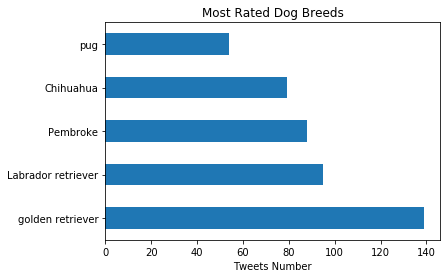

In [60]:
popular_dog_breeds = masterData.prediction_algorithm_1.value_counts()

threshold = 50 #To take the most five

popular_dog_breeds = popular_dog_breeds.loc[(popular_dog_breeds > threshold)] #To loc the most five
popular_dog_breeds.plot(kind='barh') #To show the result in a horizontal bar plot

plt.title('Most Rated Dog Breeds')
plt.xlabel('Tweets Number')

plt.show(); #To show the plots

<span style="color:purple">So, the most popular dogs on the WeRateDogs Twitter are Golden Retrievers, then Labrador Retrievers, Pembrokes, Chihuahuas and Pugs.</span>

#### 2- Most Favorite Tweet

In [61]:
#First, I want to know the mean:
MeanFavorite=round(masterData.favorite_count.mean())
MeanFavorite

8896

In [62]:
#Now, take the most favorite:
masterData[masterData.favorite_count == 132810].text #The maximum of favorite_count is 132810

309    Here's a super supportive puppo participating ...
Name: text, dtype: object

<span style="color:purple">So, the most favorited tweet is a picture with #WomensMarch trends:</span>
    
<span style="color:purple">"Here's a super supportive puppo participating in the Toronto  #WomensMarch today. 13/10."</span>

#### 3- Prediction Algorithm

In [63]:
#I want to know which prediction algorithm is predicting well:
p1Master=masterData['p1_dog'].value_counts()
p2Master=masterData['p2_dog'].value_counts()
p3Master=masterData['p3_dog'].value_counts()


print('Prediction Algorithm 1:')
print(p1Master)
print('Prediction Algorithm 2:')
print(p2Master)
print('Prediction Algorithm 3:')
print(p3Master)

Prediction Algorithm 1:
True     1477
False     517
Name: p1_dog, dtype: int64
Prediction Algorithm 2:
True     1495
False     499
Name: p2_dog, dtype: int64
Prediction Algorithm 3:
True     1446
False     548
Name: p3_dog, dtype: int64


<span style="color:purple">So, prediction 2 is the most accurate prediction algorithm because 1495 prediction is true.</span>

### Visualizing

#### 1- The most used Twitter source

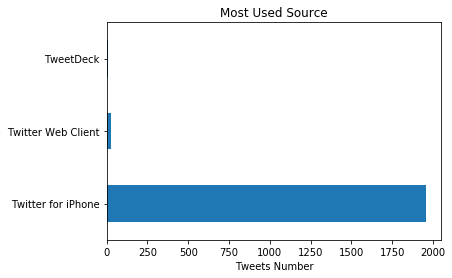

In [64]:
sourseMaster=masterData['source_x'].value_counts() #source_x is the cleaned one

sourseMaster.plot(kind='barh')

plt.title('Most Used Source')
plt.xlabel('Tweets Number')

plt.show();

<span style="color:purple">As we see, the most used source for Twitter is iPhone.</span>